# Capstone Project: Company Bankruption Prediction

# DTSC 691: Default Machine Learning Project

# From: Sidd Patel


## Introduction

The Wall Street crash of 1929 resulted in the creation of the United States Securities and Exchange Commission (SEC) in which its primary purpose was the following: facilitate capital formation, protect investors, and maintain fair and efficient markets. In order to achieve its mandate, SEC required publicly traded companies to submit quarterly and annual reports which are composed of financial statements along with management discussion and analysis. These financial statements are imperative to investors and creditors as it can provide an insight about a company's profitability and ability to meet its short and long-term financial obligations. As seen during the pandemic turmoil, J.C. Penny, Matress Firm and many others have declared bankruptcy affecting investors and creditors to employees. 

The SEC filings are used by many analysts and regulators to determine company's financial and operating performance. With the given financial metrics, the goal of this project is to create a machine learning algorithm which utilizes econometric and financial metrics to predict if a company will go bankrupt (binary classification). 



## Data Description

The dataset "Companies bankruptcy forecast" was obtained from Kaggle. Per Kaggle, the dataset was extracted from the Emerging Markets Information Services for Polish companies from the following periods: a) bankrupt companues from 2000 to 2012 and b) operating companies from 2007 to 2013



    
Summary
    
[A] - Import Libraries

[B] - Create Class

[C] - Load Dataset and Exploratory Analysis

[D] - Preprocessing 

[E] - Train Machine Learning Model
i. Reduced Dataframe
ii. Undersampling Method
iii. Oversampling Method
iv. SMOTE Method


[F] - More Information Regarding Best Model


[G] - Model File For Deployment


## [A]. Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## [B]. Create Class

 ###### Missing Values?

In [22]:
def missing_values(df):
    counter = df.isnull().any()
    if str(counter.unique()) == str([True]):
        print("There are missing values")
    elif str(counter.unique()) == str([False]):
        print("There are no missing values in this dataset")
    else:
        print("There are missing values")

 ###### To Create Barchart

In [23]:
'''
Class input requires a dataframe and column name which will generate a barchart
'''
def column_distribution(df,column):
    '''Input column name to retrieve the distrubition'''
    distribution = pd.DataFrame(df[column].value_counts())
    distribution.plot(kind='bar',xlabel='Bankrupt (0 - Not Bankrupt ; 1 - Bankrupt)',ylabel='Frequency',title='Class Distribution')
    print(distribution)

 ###### Train-Test Split

In [24]:
'''
Class input requires a dataframe which generates x_train, x_test, y_train, and y_test
'''
def preprocess_inputs(df):
    df = df.copy()
    # Split dataframe into X and Y dataframesn(X=Features, Y=Target)
    X = df.drop("class", axis=1)
    y = df["class"]
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42, stratify = y)
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

 ###### Train Model

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}


def train_model(X_train,X_test,y_train,y_test):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # Training set performance
        model_train_accuracy = accuracy_score(y_train,y_train_pred)
        model_train_precision = precision_score(y_train, y_train_pred)
        model_train_recall = recall_score(y_train,y_train_pred)
        model_train_f1_score = f1_score(y_train,y_train_pred)
        
        
        # Test set performance 
        model_test_accuracy = accuracy_score(y_test,y_test_pred)
        model_test_precision = precision_score(y_test, y_test_pred)
        model_test_recall = recall_score(y_test,y_test_pred)
        model_test_f1_score = f1_score(y_test,y_test_pred)

        print(list(models.keys())[i])

        print('Model performance for Training set')
        print(" - Accuracy: {:.4f}".format(model_train_accuracy))
        print(" - Precision: {:.4f}".format(model_train_precision))
        print(" - Recall: {:.4f}".format(model_train_recall))
        print(" - F1-Score: {:.4f}".format(model_train_f1_score))
        
        print('------------------------------')
        print('Model performance for Test set')
        print(" - Accuracy: {:.4f}".format(model_test_accuracy))
        print(" - Precision: {:.4f}".format(model_test_precision))
        print(" - Recall: {:.4f}".format(model_test_recall))
        print(" - F1-SCore: {:.4f}".format(model_test_f1_score))
        print('='*30)

        print('\n')


In [26]:
def confusion_matrix_counter(predicted,true):
    cm = confusion_matrix(predicted,true)
    TP = cm[0][0]
    FP = cm[0][1]
    TN = cm[1][1]
    FN = cm[1][0]

    print(f"TP:{TP}")
    print(f"FP:{FP}")
    print(f"TN:{TN}")
    print(f"FN:{FN}")

## [C]. Load Dataset and Exploratory Analysis

 ###### Load Dataset

In [27]:
# Load Dataset
bankruptcy_df = pd.read_csv("bankruptcy_Train.csv")

# Change option to see all of the columns and rows
#pd.set_option('max_columns', None)
#pd.set_option('max_rows',None)

 ###### Explore Data

In [28]:
# Shape of the dataframe (10,000 rows and 65 columns)
bankruptcy_df.shape

(10000, 65)

In [29]:
# Visualizing the first five rows of the dataset
bankruptcy_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [30]:
# Present more information on the columns

'''
As shown in the chart below, the standard deviations vary from each column. We will need to standardize our dataset when using the Principal Component Analysis (PCA).
Additionally, there are outliers in many of these columns; however, we will be keeping these for the machine learning purpose.
'''

bankruptcy_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.007954,-0.007140,-0.003544,0.005005,-0.004687,0.001455,-0.006963,0.009053,0.006763,0.007456,...,0.009804,0.005208,-0.009751,-0.002655,0.004548,0.014331,-0.006864,0.020750,-0.003984,0.020300
std,1.396405,1.409440,1.015494,0.908020,1.394750,1.286713,1.412509,1.064426,1.171199,1.407349,...,0.017370,0.718682,0.026124,0.467139,1.252571,1.171160,0.277288,1.115182,0.930875,0.141032
min,-9.474787,-140.604555,-25.597146,-0.381641,-138.720013,-26.249562,-141.176615,-0.966015,-1.294340,-2.528495,...,-1.657288,-42.381245,-0.037484,-3.218490,-0.048598,-0.412525,-0.022204,-0.743297,-0.050969,0.000000
25%,-0.079776,-0.055604,-0.516971,-0.192306,0.006798,-0.016047,-0.008018,-0.445667,-0.388184,-0.068584,...,0.009315,0.003199,-0.010766,-0.022740,-0.043418,-0.221237,-0.016847,-0.371384,-0.041603,0.000000
50%,-0.019204,0.000246,0.003186,-0.117972,0.007302,-0.016047,0.004280,-0.260150,-0.307842,0.000253,...,0.009838,0.010013,-0.009924,-0.020438,-0.039928,-0.139653,-0.013821,-0.180311,-0.034319,0.000000
75%,0.081218,0.056957,0.585722,0.022705,0.007753,0.016026,0.024222,0.098874,0.156638,0.070036,...,0.010693,0.019900,-0.009416,-0.014401,-0.031820,-0.002210,-0.009476,0.133244,-0.020507,0.000000
max,137.557872,2.004925,3.324327,60.825460,11.556238,121.354736,0.623095,47.504463,62.936396,140.123299,...,0.036727,37.405312,2.551674,27.969785,117.341069,59.139158,23.970250,62.527240,90.774695,1.000000


 ###### Column Names and Key (Formulas)

In [31]:
# Retrive the list of all of column names
bankruptcy_column_names = bankruptcy_df.columns
print(bankruptcy_column_names)

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')


In [76]:
# Key for column names 
pd.set_option('display.max_rows', None)
# Retrive the column names for the dataset
df1 = pd.DataFrame(bankruptcy_column_names)
df1 = df1.rename(columns={0: "Column Name"})

# Corresponding financial metric to the column names
df2 = pd.DataFrame(['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities','(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365','retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets', 'equity / total assets', '(gross profit + extraordinary items + financial expenses) / total assets', 'gross profit / short-term liabilities', '(gross profit + depreciation) / sales', '(gross profit + interest) / total assets', '(total liabilities * 365) / (gross profit + depreciation)', '(gross profit + depreciation) / total liabilities', 'total assets / total liabilities', 'gross profit / total assets', 'gross profit / sales', '(inventory * 365) / sales', 'sales (n) / sales (n-1)', 'profit on operating activities / total assets', 'net profit / sales', 'gross profit (in 3 years) / total assets', '(equity - share capital) / total assets', '(net profit + depreciation) / total liabilities', 'profit on operating activities / financial expenses', 'working capital / fixed assets', 'logarithm of total assets', '(total liabilities - cash) / sales', '(gross profit + interest) / sales', '(current liabilities * 365) / cost of products sold', 'operating expenses / short-term liabilities', 'operating expenses / total liabilities', 'profit on sales / total assets', 'total sales / total assets', '(current assets - inventories) / long-term liabilities', 'constant capital / total assets', 'profit on sales / sales', '(current assets - inventory - receivables) / short-term liabilities', 'total liabilities / ((profit on operating activities + depreciation) * (12/365))', 'profit on operating activities / sales', 'rotation receivables + inventory turnover in days', '(receivables * 365) / sales', 'net profit / inventory', '(current assets - inventory) / short-term liabilities', '(inventory * 365) / cost of products sold', 'EBITDA (profit on operating activities - depreciation) / total assets', 'EBITDA (profit on operating activities - depreciation) / sales', 'current assets / total liabilities', 'short-term liabilities / total assets', '(short-term liabilities * 365) / cost of products sold)', 'equity / fixed assets', 'constant capital / fixed assets', 'working capital', '(sales - cost of products sold) / sales', '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)', 'total costs /total sales', 'long-term liabilities / equity', 'sales / inventory', 'sales / receivables', '(short-term liabilities *365) / sales', 'sales / short-term liabilities', 'sales / fixed assets','0=Not Bankrupt, 1=Bankrupt'])
df2 = df2.rename(columns={0: "Formula: Financial Metric"})

# Concat the column names and financial metric for a key master
key = pd.concat([df1,df2], axis=1)
key


,Column Name,Formula: Financial Metric
0,Attr1,net profit / total assets
1,Attr2,total liabilities / total assets
2,Attr3,working capital / total assets
3,Attr4,current assets / short-term liabilities
4,Attr5,(cash + short-term securities + receivables - ...
5,Attr6,retained earnings / total assets
6,Attr7,EBIT / total assets
7,Attr8,book value of equity / total liabilities
8,Attr9,sales / total assets
9,Attr10,equity / total assets


###### Missing Values?

In [33]:
# There are no missing values in this dataframe
missing_values(bankruptcy_df)

There are no missing values in this dataset


 ###### Visualization


As shown below, there are many outliers in this dataset which will not be eliminated. These outliers could be a contributing factor in determining whether or not a company will go bankrupt.

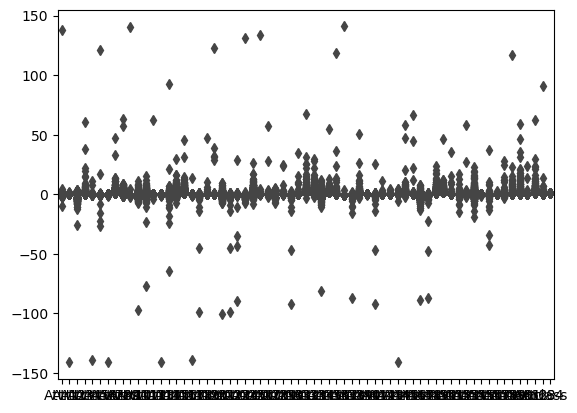

In [34]:
# Visualize the entire dataset to see if there are outliers 

####NEED TO ADD TITLE AND AXIS
ax = sns.boxplot(data=bankruptcy_df)



Visualize the 'class' column distribution. The column is composed of 0's (Not Bankrupt) or 1's (Bankrupt). As shown in the bar chart below, this column has an imbalanced data (2.03 % of the data has bankrupt data). This will play an imperative role in determining which metric to use for the machine learning models

   class
0   9797
1    203


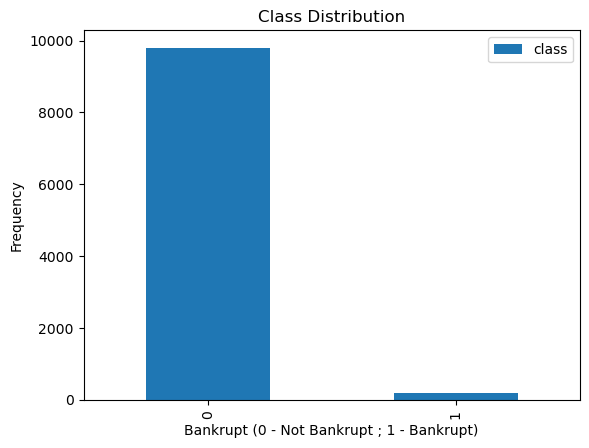

In [35]:
column_distribution(bankruptcy_df,"class")

 ###### Column Correlation Using Pearson Correlation

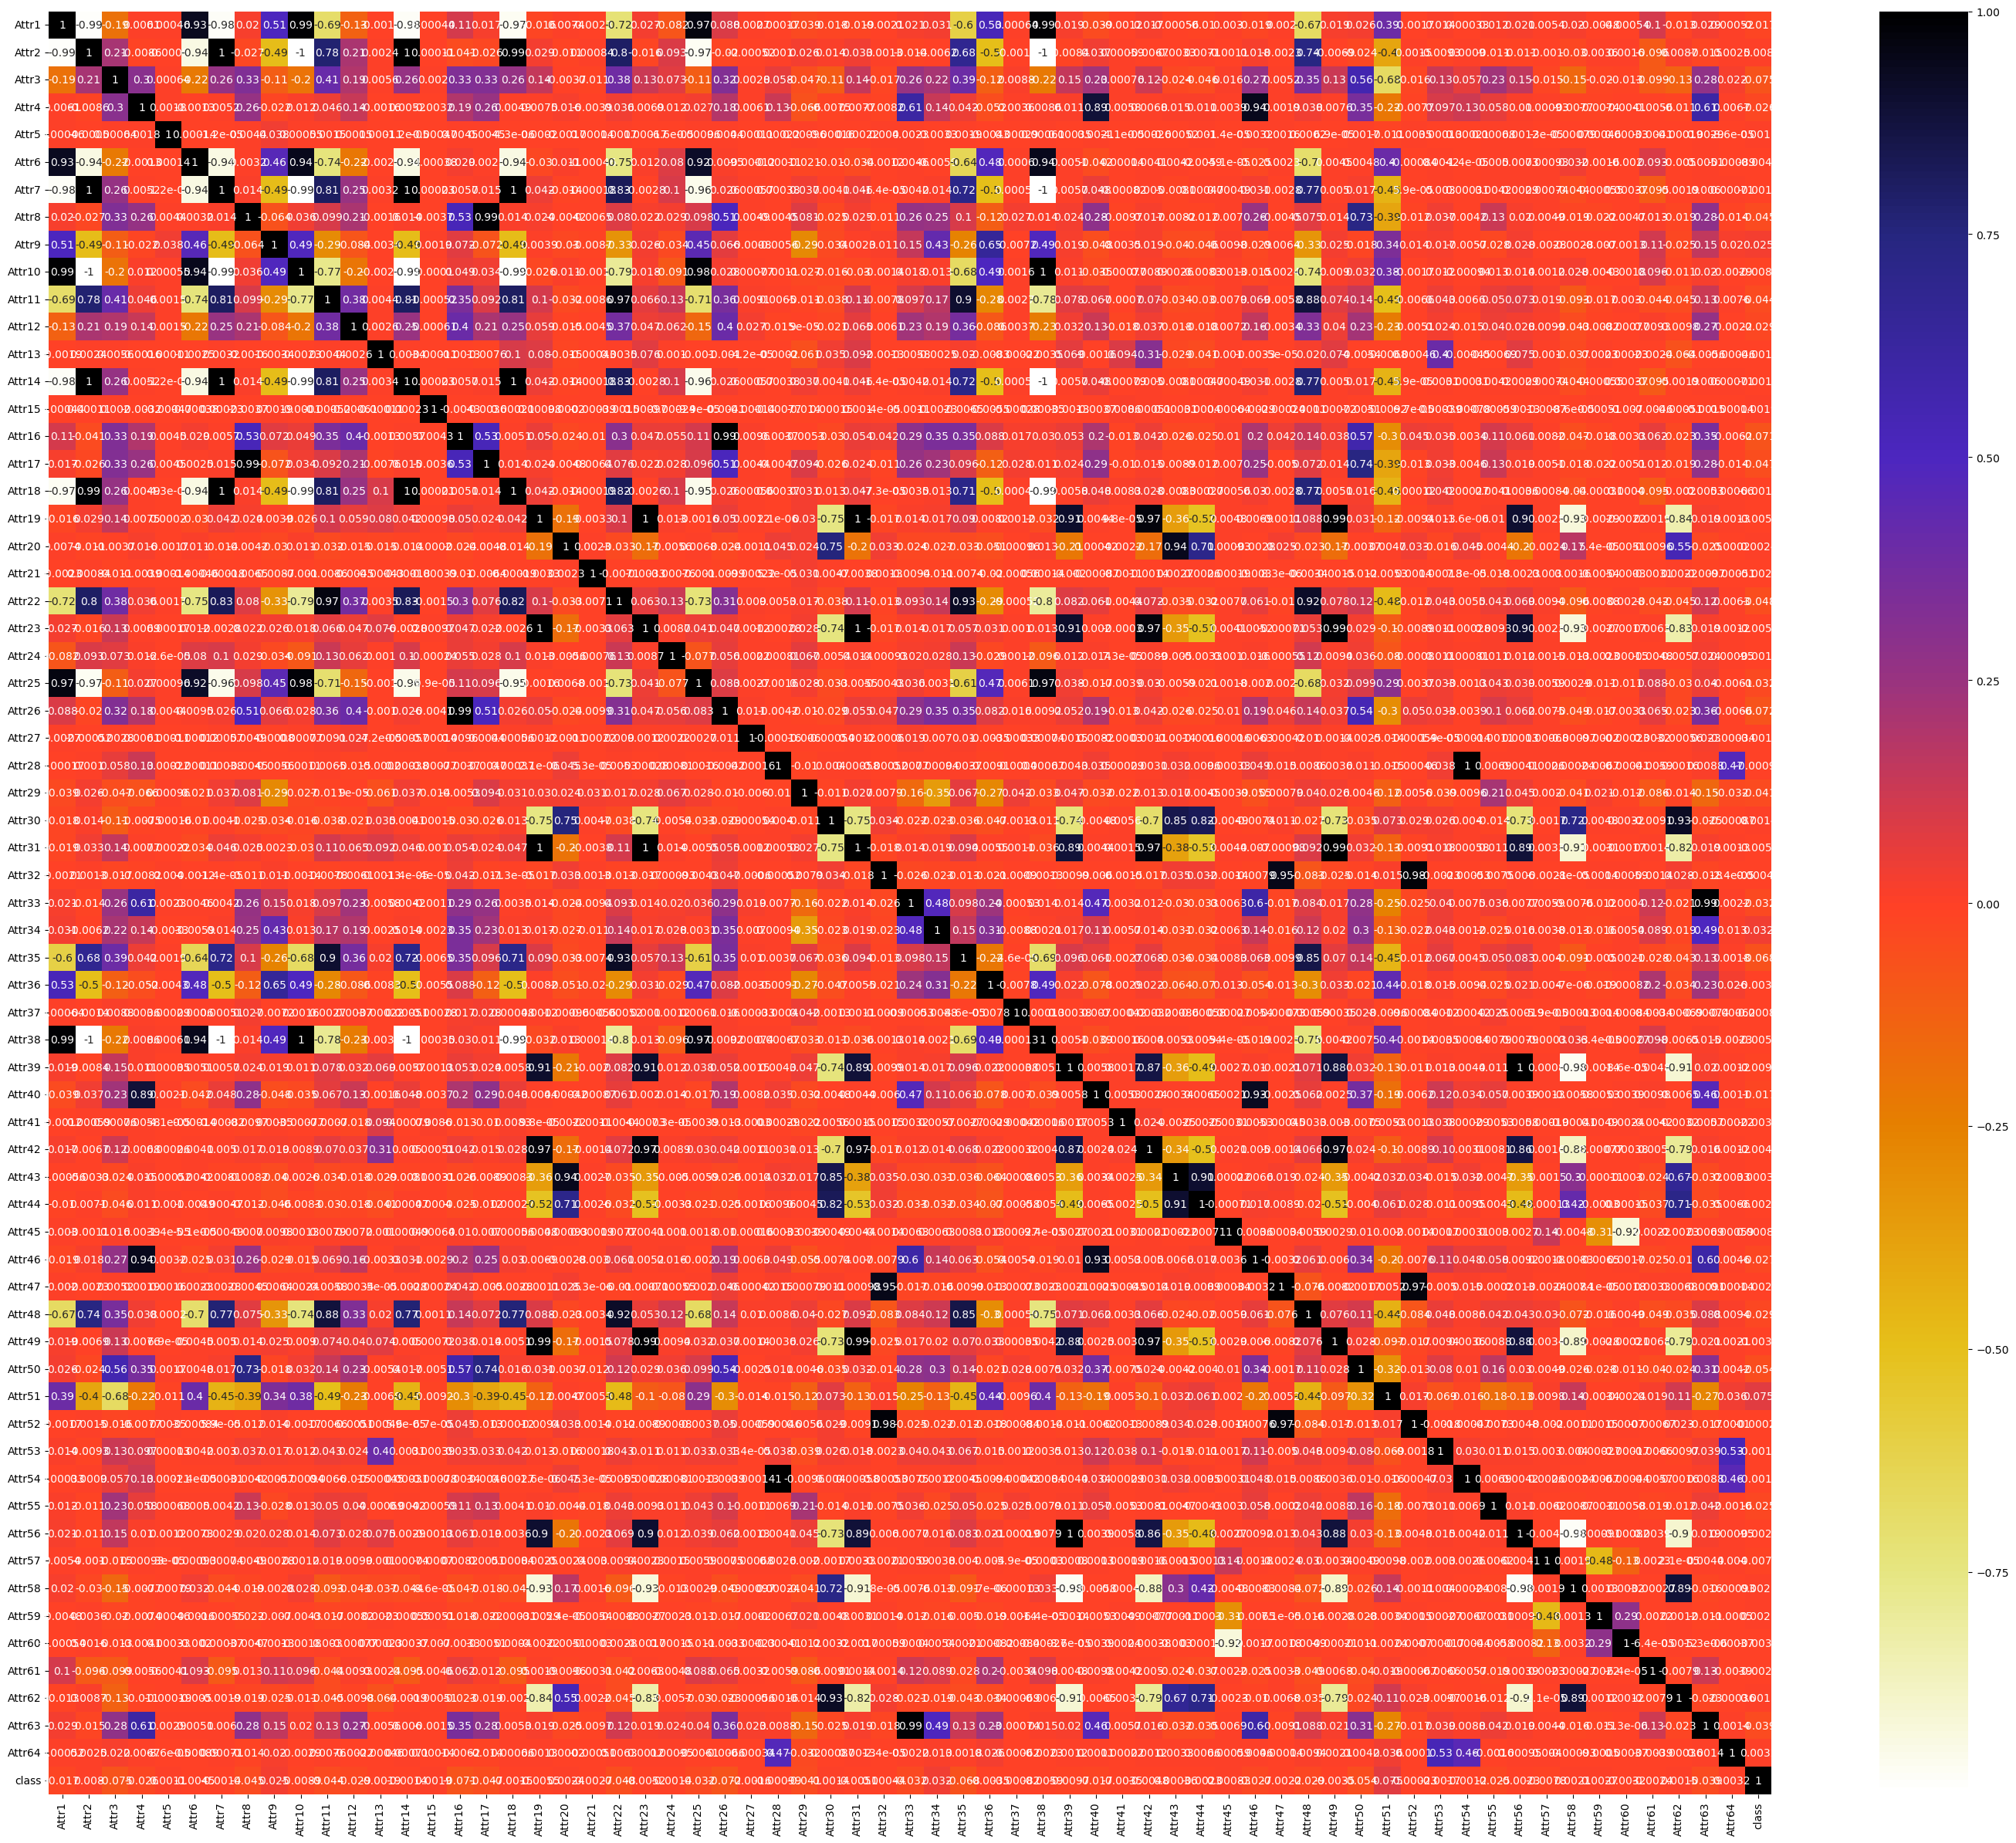

In [ ]:
# Plot a Pearson Correlation Figure
plt.figure(figsize=(36,30))
cor = bankruptcy_df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
# Class that requires a dataset and threshold ratio which returns the number of columns that are highly correlated
# There are 30 unique columns that are highly correlated. For those reasons, we can eliminate them from the dataset

def correlation(dataset,threshold_ratio):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold_ratio:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(bankruptcy_df,0.85)
len(set(corr_features))

30

 ###### Reduced Dataframe

In [37]:
'''
Eliminate the columns that are highly correlated (Pearson Correlation)
'''

reduced_df = bankruptcy_df.copy()
reduced_df = reduced_df.drop(corr_features,axis=1)

In [38]:
reduced_df.shape

(10000, 35)

In [39]:
# Show the first five rows of the reduced_df
reduced_df.head()

,Attr1,Attr3,Attr4,Attr5,Attr8,Attr9,Attr11,Attr12,Attr13,Attr15,...,Attr45,Attr50,Attr51,Attr53,Attr55,Attr57,Attr59,Attr61,Attr64,class
0,-0.031545,-0.040269,-0.013529,0.007406,0.641242,-0.748385,-0.214423,-0.036576,-0.010930,-0.005305,...,0.017225,-0.192331,-1.027090,-0.016363,-0.110578,0.005457,-0.020924,-0.214478,-0.046788,0
1,-0.231729,0.304381,-0.080975,0.007515,0.074710,0.469815,-0.835505,-0.299606,-0.013057,-0.119627,...,0.002374,0.186782,-0.079059,-0.003012,-0.114919,-0.008385,-0.023095,-0.205796,-0.027236,0
2,-0.058602,-0.488404,-0.189489,0.006572,-0.456287,0.270351,0.156944,-0.151208,-0.011717,0.009484,...,0.003911,-0.468628,0.393587,-0.030162,-0.123266,0.006779,-0.007919,0.019740,-0.033580,0
3,-0.069376,-0.181684,-0.140032,0.007477,-0.462971,-0.286746,-0.314756,-0.145529,-0.011006,0.045912,...,0.004064,-0.515188,-0.267896,-0.033926,-0.077078,0.005384,0.001381,-0.350519,-0.046823,0
4,0.236424,0.678337,-0.014680,0.007879,0.097183,0.423405,0.918860,0.208686,-0.008905,-0.021015,...,0.006550,0.342874,-0.210252,0.005230,-0.076644,0.025295,-0.022535,-0.181557,-0.023694,0


In [40]:
reduced_df.columns

Index(['Attr1', 'Attr3', 'Attr4', 'Attr5', 'Attr8', 'Attr9', 'Attr11',
       'Attr12', 'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21',
       'Attr24', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr32', 'Attr33',
       'Attr34', 'Attr36', 'Attr37', 'Attr41', 'Attr45', 'Attr50', 'Attr51',
       'Attr53', 'Attr55', 'Attr57', 'Attr59', 'Attr61', 'Attr64', 'class'],
      dtype='object')

## [D]. Preprocessing

In [41]:
# Split the reduced_df into training and testing dataset
X_train, X_test, y_train, y_test = preprocess_inputs(reduced_df)

print("X_train:"+ str(X_train.shape))
print("X_test:"+ str(X_test.shape))
print("y_train:"+ str(y_train.shape))
print("y_test:"+ str(y_test.shape))

X_train:(7000, 34)
X_test:(3000, 34)
y_train:(7000,)
y_test:(3000,)


## [E]. Machine Learning Model

 ###### i. Train Model on 'reduced_df'
 

In [42]:
train_model(X_train,X_test,y_train,y_test)

Logistic Regression
Model performance for Training set
 - Accuracy: 0.9794
 - Precision: 0.3750
 - Recall: 0.0211
 - F1-Score: 0.0400
------------------------------
Model performance for Test set
 - Accuracy: 0.9767
 - Precision: 0.0000
 - Recall: 0.0000
 - F1-SCore: 0.0000




/Users/siddpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors
Model performance for Training set
 - Accuracy: 0.9803
 - Precision: 0.7500
 - Recall: 0.0423
 - F1-Score: 0.0800
------------------------------
Model performance for Test set
 - Accuracy: 0.9797
 - Precision: 0.0000
 - Recall: 0.0000
 - F1-SCore: 0.0000


Decision Tree
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performance for Test set
 - Accuracy: 0.9577
 - Precision: 0.1163
 - Recall: 0.1639
 - F1-SCore: 0.1361


Random Forest
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performance for Test set
 - Accuracy: 0.9803
 - Precision: 0.6667
 - Recall: 0.0656
 - F1-SCore: 0.1194


GradientBoostingClassifier
Model performance for Training set
 - Accuracy: 0.9899
 - Precision: 1.0000
 - Recall: 0.5000
 - F1-Score: 0.6667
------------------------------
Model per

 ###### ii. Train Model by undersampling
 

In [43]:
reduced_df_0 = reduced_df[reduced_df["class"] == 0]
reduced_df_1 = reduced_df[reduced_df["class"] == 1]

In [44]:
reduced_df_0.shape

(9797, 35)

In [45]:
reduced_df_1.shape

(203, 35)

In [46]:
# Undersample the positive class (zero). Sample size 203
reduced_df_0_undersampple = reduced_df_0.sample(203)
# Concat the 
df_undersample = pd.concat([reduced_df_0_undersampple, reduced_df_1], axis=0)

   class
0    203
1    203


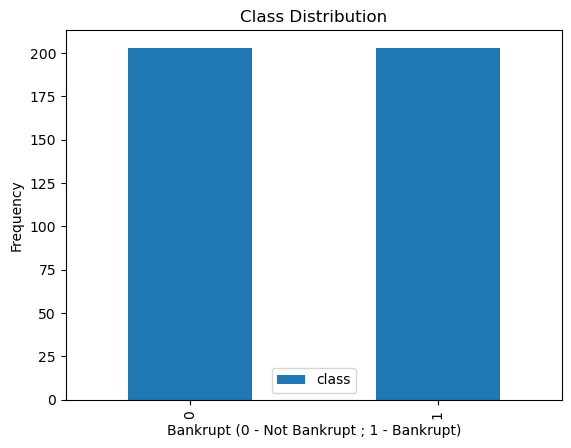

In [47]:
column_distribution(df_undersample,"class")

In [48]:
# Split dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = preprocess_inputs(df_undersample)

# Train the model
train_model(X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample)

Logistic Regression
Model performance for Training set
 - Accuracy: 0.8451
 - Precision: 0.8101
 - Recall: 0.9014
 - F1-Score: 0.8533
------------------------------
Model performance for Test set
 - Accuracy: 0.7295
 - Precision: 0.6842
 - Recall: 0.8525
 - F1-SCore: 0.7591


K-Nearest Neighbors
Model performance for Training set
 - Accuracy: 0.8451
 - Precision: 0.8551
 - Recall: 0.8310
 - F1-Score: 0.8429
------------------------------
Model performance for Test set
 - Accuracy: 0.6639
 - Precision: 0.6724
 - Recall: 0.6393
 - F1-SCore: 0.6555


Decision Tree
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performance for Test set
 - Accuracy: 0.7049
 - Precision: 0.6923
 - Recall: 0.7377
 - F1-SCore: 0.7143


Random Forest
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performanc

 ###### iii. Train Model by oversampling
 

In [49]:
df_class_1_over = reduced_df_1.sample(9797,replace=True)
df_oversample = pd.concat([df_class_1_over, reduced_df_0],axis=0)

In [50]:
df_oversample.shape

(19594, 35)

   class
1   9797
0   9797


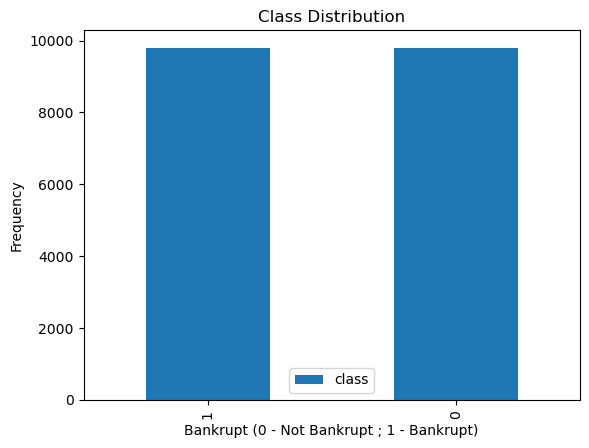

In [51]:
column_distribution(df_oversample,"class")

In [52]:
# Split dataset
X_train_over, X_test_over, y_train_over, y_test_over = preprocess_inputs(df_oversample)

# Train model
train_model(X_train_over,X_test_over,y_train_over,y_test_over)


/Users/siddpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
 - Accuracy: 0.7872
 - Precision: 0.7459
 - Recall: 0.8714
 - F1-Score: 0.8038
------------------------------
Model performance for Test set
 - Accuracy: 0.7828
 - Precision: 0.7417
 - Recall: 0.8676
 - F1-SCore: 0.7997


K-Nearest Neighbors
Model performance for Training set
 - Accuracy: 0.9791
 - Precision: 0.9600
 - Recall: 1.0000
 - F1-Score: 0.9796
------------------------------
Model performance for Test set
 - Accuracy: 0.9672
 - Precision: 0.9384
 - Recall: 1.0000
 - F1-SCore: 0.9682


Decision Tree
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performance for Test set
 - Accuracy: 0.9878
 - Precision: 0.9761
 - Recall: 1.0000
 - F1-SCore: 0.9879


Random Forest
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performanc

###### iv. Train Model by SMOTE

In [53]:
# Split dataset to features (x) and class (y)
X = reduced_df.drop('class',axis='columns')
y = reduced_df['class']
# Rename y column
y.columns = ["class"]

# Value counts of the 'class'
y.value_counts()

0    9797
1     203
Name: class, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE

# Initalize SMOTE
smote = SMOTE(sampling_strategy='minority')

# Fit it to the dataset
X_sm, y_sm = smote.fit_resample(X,y)

# Concat
df_smote = pd.concat([X_sm, y_sm],axis=1)

   class
0   9797
1   9797


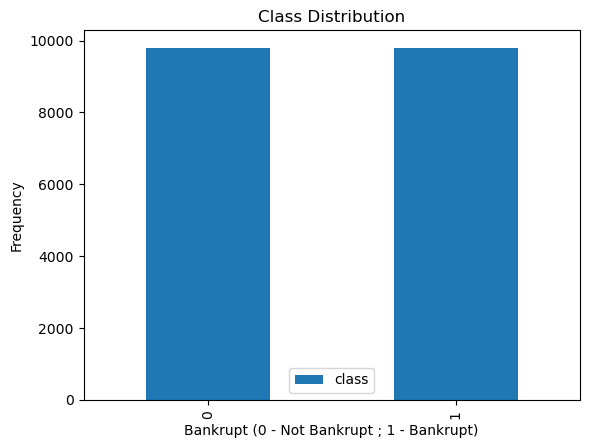

In [55]:
'''
Shows that there is an equal class between bankruptcy and not bankruptcy
'''
column_distribution(df_smote,"class")

In [56]:
# Split the dataset
X_train_smote, X_test_smote, y_train_smote, y_test_smote = preprocess_inputs(df_smote)

# Train model
train_model(X_train_smote,X_test_smote,y_train_smote,y_test_smote)

/Users/siddpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
 - Accuracy: 0.8151
 - Precision: 0.7635
 - Recall: 0.9129
 - F1-Score: 0.8316
------------------------------
Model performance for Test set
 - Accuracy: 0.8102
 - Precision: 0.7596
 - Recall: 0.9075
 - F1-SCore: 0.8270


K-Nearest Neighbors
Model performance for Training set
 - Accuracy: 0.9527
 - Precision: 0.9143
 - Recall: 0.9990
 - F1-Score: 0.9548
------------------------------
Model performance for Test set
 - Accuracy: 0.9304
 - Precision: 0.8806
 - Recall: 0.9959
 - F1-SCore: 0.9347


Decision Tree
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performance for Test set
 - Accuracy: 0.9512
 - Precision: 0.9365
 - Recall: 0.9680
 - F1-SCore: 0.9520


Random Forest
Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performanc

## [F]. More Information On Best Model (Random Forest)

###### Accuracy, Precision, Recall, F1-Score

In [82]:
# Use oversample dataframe
df = df_oversample.head()

# Split dataframe into X and Y dataframesn(X=Features, Y=Target)
X = df.drop("class", axis=1)
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42, stratify = y)

# Scale X_train and X_test
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Initalize RandomForestClassifier
randomforest = RandomForestClassifier(random_state=42)

# Fit the training set
randomforest.fit(X_train_over,y_train_over)

# Make Predictions
y_train_pred = randomforest.predict(X_train_over)
y_test_pred = randomforest.predict(X_test_over)

# Training set performance
model_train_accuracy = accuracy_score(y_train_over,y_train_pred)
model_train_precision = precision_score(y_train_over, y_train_pred)
model_train_recall = recall_score(y_train_over,y_train_pred)
model_train_f1_score = f1_score(y_train_over,y_train_pred,average='weighted')

# Test set performance 
model_test_accuracy = accuracy_score(y_test_over,y_test_pred)
model_test_precision = precision_score(y_test_over, y_test_pred)
model_test_recall = recall_score(y_test_over,y_test_pred)
model_test_f1_score = f1_score(y_test_over,y_test_pred,average='weighted')

print('Model performance for Training set')
print(" - Accuracy: {:.4f}".format(model_train_accuracy))
print(" - Precision: {:.4f}".format(model_train_precision))
print(" - Recall: {:.4f}".format(model_train_recall))
print(" - F1-Score: {:.4f}".format(model_train_recall))

print('------------------------------')
print('Model performance for Test set')
print(" - Accuracy: {:.4f}".format(model_test_accuracy))
print(" - Precision: {:.4f}".format(model_test_precision))
print(" - Recall: {:.4f}".format(model_test_recall))
print(" - F1-Score: {:.4f}".format(model_test_f1_score))
print('='*30)

print('\n')




Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performance for Test set
 - Accuracy: 0.9978
 - Precision: 0.9956
 - Recall: 1.0000
 - F1-Score: 0.9978




In [81]:
# Split dataset into training and testing
X_train_over, X_test_over, y_train_over, y_test_over = preprocess_inputs(df_oversample)

# Initalize RandomForestClassifier
randomforest = RandomForestClassifier(random_state=42)

# Fit the training set
randomforest.fit(X_train_over,y_train_over)

# Make Predictions
y_train_pred = randomforest.predict(X_train_over)
y_test_pred = randomforest.predict(X_test_over)

# Training set performance
model_train_accuracy = accuracy_score(y_train_over,y_train_pred)
model_train_precision = precision_score(y_train_over, y_train_pred)
model_train_recall = recall_score(y_train_over,y_train_pred)
model_train_f1_score = f1_score(y_train_over,y_train_pred,average='weighted')

# Test set performance 
model_test_accuracy = accuracy_score(y_test_over,y_test_pred)
model_test_precision = precision_score(y_test_over, y_test_pred)
model_test_recall = recall_score(y_test_over,y_test_pred)
model_test_f1_score = f1_score(y_test_over,y_test_pred,average='weighted')

print('Model performance for Training set')
print(" - Accuracy: {:.4f}".format(model_train_accuracy))
print(" - Precision: {:.4f}".format(model_train_precision))
print(" - Recall: {:.4f}".format(model_train_recall))
print(" - F1-Score: {:.4f}".format(model_train_recall))

print('------------------------------')
print('Model performance for Test set')
print(" - Accuracy: {:.4f}".format(model_test_accuracy))
print(" - Precision: {:.4f}".format(model_test_precision))
print(" - Recall: {:.4f}".format(model_test_recall))
print(" - F1-Score: {:.4f}".format(model_test_f1_score))
print('='*30)

print('\n')


Model performance for Training set
 - Accuracy: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - F1-Score: 1.0000
------------------------------
Model performance for Test set
 - Accuracy: 0.9978
 - Precision: 0.9956
 - Recall: 1.0000
 - F1-Score: 0.9978




###### Confusion Matrix

In [58]:
confusion_matrix_counter(y_test_pred,y_test_over)

TP:2927
FP:0
TN:2939
FN:13


## [G]. Model File For Deployment

###### Pickle for Random Forest Model

In [ ]:
import pickle

pickle.dump(randomforest,open('randomforestmodel.pkl','wb'))

###### Pickle for Standard Scaler

In [83]:
import pickle

pickle.dump(scaler,open('scaling.pkl','wb'))